In [1]:
# import mysql.connector as connection
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import math
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# host = 'localhost'
# username = 'root'
# passwd = ''
# database = 'db_ml_dummies'

In [3]:
# try:
#     db = connection.connect(host=host, database=database,user=username, passwd=passwd,use_pure=True)
#     query = "SELECT * FROM tasks;"
#     df = pd.read_sql(query, db)
#     db.close()
# except Exception as e:
#     db.close()
#     print(str(e))

In [4]:
df = pd.read_csv('inserted_tasks.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   task_type                  20 non-null     int64
 1   number_of_peoples          20 non-null     int64
 2   estimated_time_in_minutes  20 non-null     int64
dtypes: int64(3)
memory usage: 544.0 bytes


In [6]:
df.head()

,task_type,number_of_peoples,estimated_time_in_minutes
0,1,1,1440
1,1,2,1080
2,1,1,2160
3,1,2,1200
4,1,3,720


In [7]:
df.describe()

,task_type,number_of_peoples,estimated_time_in_minutes
count,20.000000,20.000000,20.000000
mean,1.900000,1.800000,985.500000
std,0.852242,0.833509,728.065027
min,1.000000,1.000000,90.000000
25%,1.000000,1.000000,240.000000
50%,2.000000,2.000000,1110.000000
75%,3.000000,2.250000,1350.000000
max,3.000000,3.000000,2880.000000


In [8]:
df.shape

(20, 3)

<AxesSubplot:>

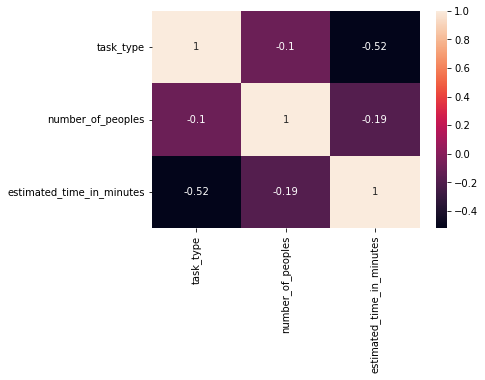

In [9]:
sns.heatmap(df.corr(), annot=True)

In [10]:
# df.to_csv('inserted_tasks.csv', index=False)

In [11]:
# scaler = MinMaxScaler()
# scaler.fit(df)
# df[list(df.columns)] = scaler.transform(df)

In [12]:
X = df.drop(columns="estimated_time_in_minutes")
y = pd.Series(df['estimated_time_in_minutes'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
linReg = LinearRegression()

linReg.fit(X_train, y_train)

LinearRegression()

In [14]:
# R2 Score
print(linReg.score(X_test, y_test))
# Coefficient
print(linReg.coef_)
# Intercept
print(linReg.intercept_)

0.5328025673872403
[-434.63495575 -243.15265487]
2318.9767699115046


In [15]:
y_pred =  linReg.predict(X_test)
print(y_pred)

[1641.18915929  528.76659292  771.91924779 1398.03650442]


In [16]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
# MAE
print(mean_absolute_error(y_test, y_pred))
# MAPE
print(mean_absolute_percentage_error(y_test, y_pred))
# MSE
print(mean_squared_error(y_test, y_pred))
# RMSE
print(math.sqrt(mean_squared_error(y_test, y_pred)))

349.97787610619457
114.70288301991145
136550.12961689432
369.52689972029685


In [18]:
request = {
    'task_type': [3],
    'number_of_peoples': [3],
    # 'estimated_time_in_minutes': [0]
}

# Create Pandas DataFrame
request = pd.DataFrame.from_dict(request)
# # Scale the request
# request[list(request.columns)] = scaler.transform(request)
# Remove unused column
# request = request.drop(columns='estimated_time_in_minutes')

In [19]:
result = linReg.predict(request)
print(result)

[285.61393805]


In [20]:
# originalRequest = request
# originalRequest['estimated_time_in_minutes'] = result[0]
# scaledRequest = scaler.inverse_transform(originalRequest);

# print(scaledRequest[0, 2])

In [21]:
# save the model to disk
# modelname = 'finalized_model.sav'
# pickle.dump(linReg, open(modelname, 'wb'))

# scalername = 'scaler.sav'
# pickle.dump(scaler, open(scalername, 'wb'))